# Trying out sigmoid fadeouts 

## One-dimensional sigmoids 

In [66]:
import numpy as np
# Trying radius first
a = np.array(np.tile(1,50))
fixHole = 10
fadeHole = 20
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
aFixHole = a[0:fixHole]
print aFixHole

[1 1 1 1 1 1 1 1 1 1]


In [2]:
aSize = a.shape[0]
print aSize

50


In [3]:
aFadeOut = a[aSize-fadeOut:aSize]
print aFadeOut

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [4]:
x = np.linspace(-5,5,fixHole)
print x

[-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
  1.66666667  2.77777778  3.88888889  5.        ]


In [5]:
print sigmoid(x)

[ 0.00669285  0.02005754  0.0585369   0.1588691   0.36457644  0.63542356
  0.8411309   0.9414631   0.97994246  0.99330715]


## 2D sigmoids

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D projection
grtSz = 256
fixR = 10 # fixation radius

In [108]:
def sigmoid2d(x,y):
    return (1 / (1 + np.exp(-x))) * (1 / (1 + np.exp(-y)))

In [117]:
x = np.arange(-grtSz/2,grtSz/2)
y = np.arange(-grtSz/2,grtSz/2)
x, y = np.meshgrid(x, y)
R = np.sqrt(x**2 + y**2)
#Z = sigmoid2d(x,y)
Z = sigmoid(R)
Z = np.sin(R)

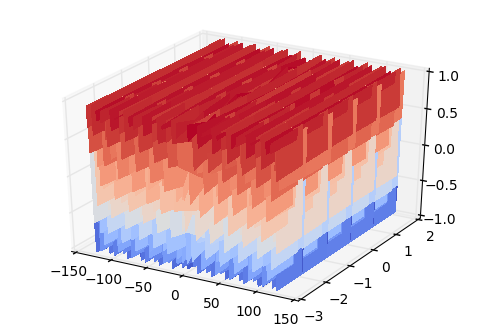

In [121]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x[125:131], y[125:131], Z[125:131], rstride=1, cstride=1, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=False)
plt.show()

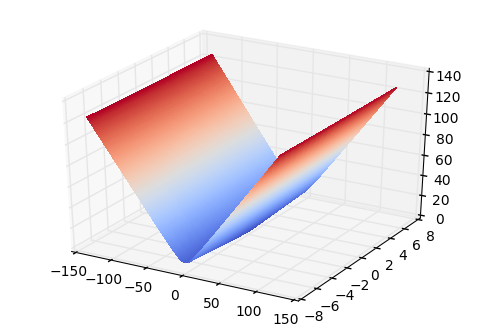

In [113]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x[120:136], y[120:136], R[120:136], rstride=1, cstride=1, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=False)
plt.show()

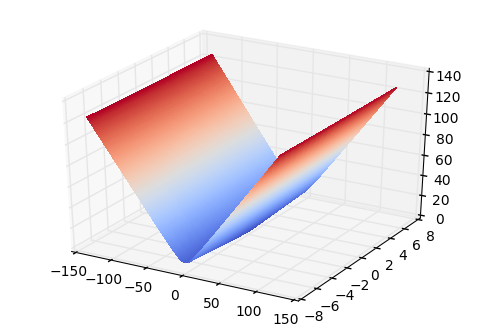

In [92]:
def fadeIn(R, fixHole=fixHole, sigmoid=sigmoid):
    # R should start from -5, but still extend to its maximum value
    #maskIn = np.dot(R - 5, np.max(R) / (np.max(R) - 5))
    maskIn = R
    #maskIn = 2 * (5 * R / (fixHole)) - 5
    #maskIn = 2 * sigmoid(maskIn) - 1
    return maskIn
maskIn = fadeIn(R)
#print maskIn[120:136,120:136]
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x[120:136], y[120:136], maskIn[120:136], rstride=1, cstride=1, 
                       cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()

In [ ]:
def fadeOut(R, fadeHole=fadeHole, sigmoid=sigmoid):
    maskOut = R > 